In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import pydotplus
import io

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from scipy import misc

%matplotlib inline

In [155]:
data16 = pd.read_csv('2016.csv')

In [156]:
data16.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [157]:
data16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [158]:
train, test = train_test_split(data16, test_size = 0.1)

In [159]:
 print("Train: {}, Test: {}".format(len(train), len(test)))

Train: 141, Test: 16


In [160]:
c = DecisionTreeClassifier(min_samples_split=15)

In [161]:
features = ["Happiness Rank", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)",
            "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]

In [162]:
X_train = train[features]
y_train = train["Region"]

X_test = test[features]
y_test = test["Region"]

In [163]:
dt = c.fit(X_train, y_train)

In [164]:
custom_colors = ["#f0cd59", "#95a5f4"]
palette = sns.color_palette(custom_colors)
sns.set_palette(palette)
sns.set_style("white")

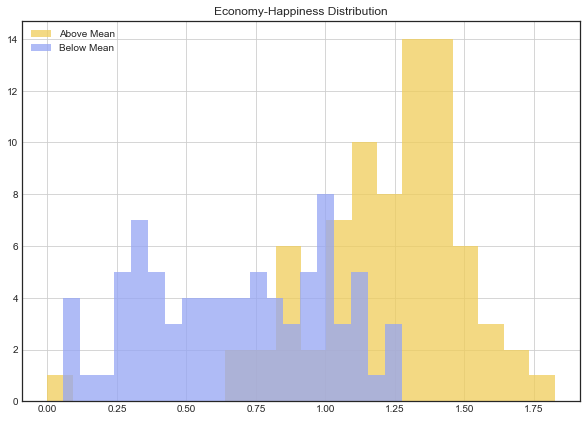

In [165]:
large_econ = data16[data16['Happiness Score'] > 5.38]['Economy (GDP per Capita)']
small_econ = data16[data16['Happiness Score'] <= 5.38]['Economy (GDP per Capita)']
large_family = data16[data16['Happiness Score'] > 5.38]['Family']
small_family = data16[data16['Happiness Score'] <= 5.38]['Family']
large_health = data16[data16['Happiness Score'] > 5.38]['Health (Life Expectancy)']
small_health = data16[data16['Happiness Score'] <= 5.38]['Health (Life Expectancy)']
large_freedom = data16[data16['Happiness Score'] > 5.38]['Freedom']
small_freedom = data16[data16['Happiness Score'] <= 5.38]['Freedom']
large_trust = data16[data16['Happiness Score'] > 5.38]['Trust (Government Corruption)']
small_trust = data16[data16['Happiness Score'] <= 5.38]['Trust (Government Corruption)']
large_generosity = data16[data16['Happiness Score'] > 5.38]['Generosity']
small_generosity = data16[data16['Happiness Score'] <= 5.38]['Generosity']
large_dystopia = data16[data16['Happiness Score'] > 5.38]['Dystopia Residual']
small_dystopia = data16[data16['Happiness Score'] <= 5.38]['Dystopia Residual']

fig = plt.figure(figsize=(10,7))
plt.title("Economy-Happiness Distribution")
large_econ.hist(alpha = 0.75, bins = 20, label="Above Mean")
small_econ.hist(alpha = 0.75, bins = 20, label="Below Mean")
plt.legend(loc = "upper left")

C:\Users\acer-pc\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Dystopia-Happiness Distribution')

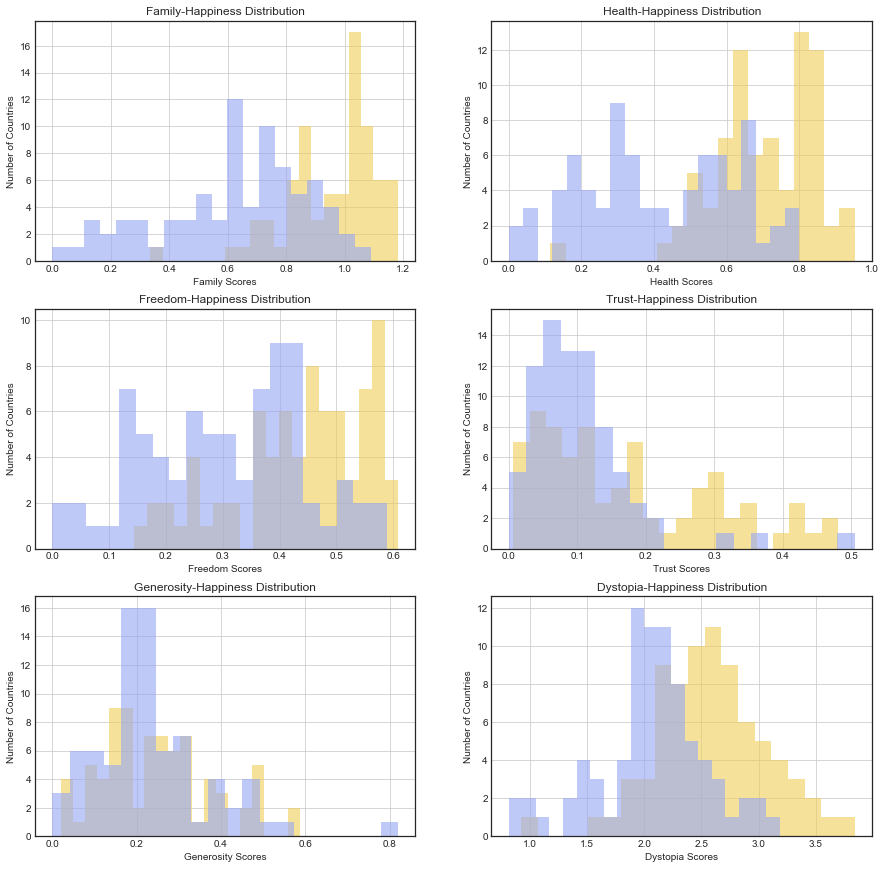

In [173]:
subfig = plt.figure(figsize=(15,15))

# Family
ax1 = subfig.add_subplot(321)
large_family.hist(alpha = 0.6, bins = 20)
ax2 = fig.add_subplot(321)
small_family.hist(alpha = 0.6, bins = 20)
ax1.set_xlabel('Family Scores')
ax1.set_ylabel('Number of Countries')
ax1.set_title('Family-Happiness Distribution')

# Health (Life Expectancy)
ax3 = subfig.add_subplot(322)
large_health.hist(alpha = 0.6, bins = 20)
ax4 = fig.add_subplot(322)
small_health.hist(alpha = 0.6, bins = 20)
ax3.set_xlabel('Health Scores')
ax3.set_ylabel('Number of Countries')
ax3.set_title('Health-Happiness Distribution')

# Freedom
ax5 = subfig.add_subplot(323)
large_freedom.hist(alpha = 0.6, bins = 20)
ax6 = fig.add_subplot(323)
small_freedom.hist(alpha = 0.6, bins = 20)
ax5.set_xlabel('Freedom Scores')
ax5.set_ylabel('Number of Countries')
ax5.set_title('Freedom-Happiness Distribution')

# Trust (Government Corruption)
ax7 = subfig.add_subplot(324)
large_trust.hist(alpha = 0.6, bins = 20)
ax8 = fig.add_subplot(324)
small_trust.hist(alpha = 0.6, bins = 20)
ax7.set_xlabel('Trust Scores')
ax7.set_ylabel('Number of Countries')
ax7.set_title('Trust-Happiness Distribution')

# Generosity
ax9 = subfig.add_subplot(325)
large_generosity.hist(alpha = 0.6, bins = 20)
ax10 = fig.add_subplot(325)
small_generosity.hist(alpha = 0.6, bins = 20)
ax9.set_xlabel('Generosity Scores')
ax9.set_ylabel('Number of Countries')
ax9.set_title('Generosity-Happiness Distribution')

# Dystopia Residual
ax11 = subfig.add_subplot(326)
large_dystopia.hist(alpha = 0.6, bins = 20)
ax12 = fig.add_subplot(326)
small_dystopia.hist(alpha = 0.6, bins = 20)
ax11.set_xlabel('Dystopia Scores')
ax11.set_ylabel('Number of Countries')
ax11.set_title('Dystopia-Happiness Distribution')

In [167]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

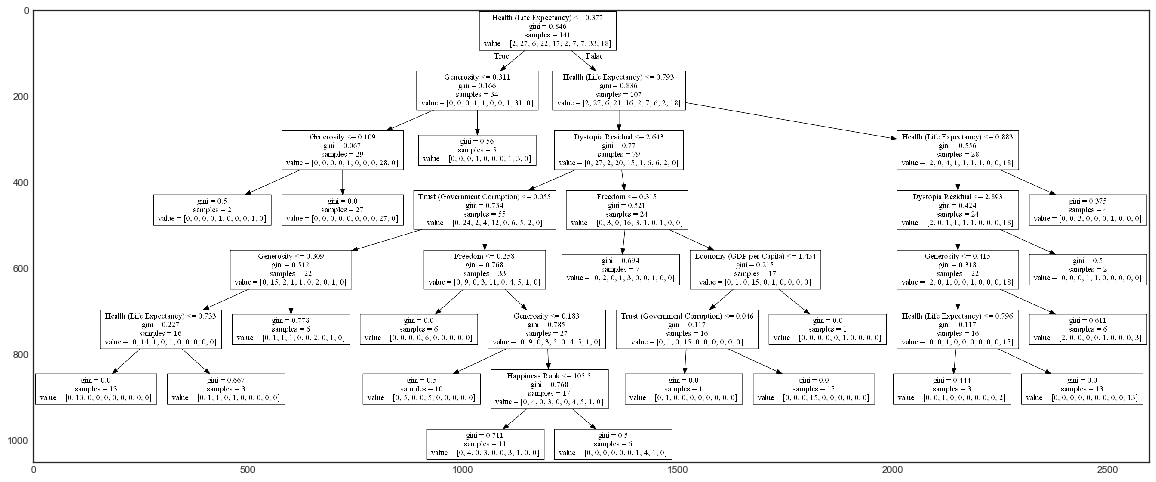

In [168]:
show_tree(dt, features, 'decision_tree_16.png')

In [169]:
y_pred = c.predict(X_test)

In [170]:
y_pred

array(['Western Europe', 'Sub-Saharan Africa',
       'Central and Eastern Europe', 'Middle East and Northern Africa',
       'Sub-Saharan Africa', 'Latin America and Caribbean',
       'Sub-Saharan Africa', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe', 'Central and Eastern Europe',
       'Central and Eastern Europe', 'Western Europe',
       'Central and Eastern Europe'], dtype=object)

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
print("Accuracy (Decision Tree): ", round(accuracy_score(y_test, y_pred) * 100, 3), "%")

Accuracy (Decision Tree):  56.25 %
